In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
bird_data=pd.read_csv('/content/bird_migration.csv')
temporal_data=pd.read_csv('/content/temporal_dataset.csv')
weather_data=pd.read_csv('/content/weather_data.csv')


In [ ]:
bird_data.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [ ]:
temporal_data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
weather_data.columns

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

In [ ]:
print(bird_data.head())
#temporal_data.head()
#weather_data.head()

   Unnamed: 0  altitude               date_time  device_info_serial  \
0           0        71  2013-08-15 00:18:08+00                 851   
1           1        68  2013-08-15 00:48:07+00                 851   
2           2        68  2013-08-15 01:17:58+00                 851   
3           3        73  2013-08-15 01:47:51+00                 851   
4           4        69  2013-08-15 02:17:42+00                 851   

    direction   latitude  longitude  speed_2d bird_name  
0 -150.469753  49.419860   2.120733  0.150000      Eric  
1 -136.151141  49.419880   2.120746  2.438360      Eric  
2  160.797477  49.420310   2.120885  0.596657      Eric  
3   32.769360  49.420359   2.120859  0.310161      Eric  
4   45.191230  49.420331   2.120887  0.193132      Eric  


In [ ]:
print(temporal_data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [ ]:
print(weather_data.head())

       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


In [ ]:
print(bird_data.isnull().sum())

Unnamed: 0              0
altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64


In [ ]:
bird_data.fillna(method='ffill', inplace=True)

In [ ]:
print(weather_data.isnull().sum())

Location            0
Date_Time           1
Temperature_C       1
Humidity_pct        1
Precipitation_mm    1
Wind_Speed_kmh      1
dtype: int64


In [ ]:
weather_data.fillna(method='ffill', inplace=True)

In [ ]:
print(temporal_data.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [ ]:
bird_data.shape,temporal_data.shape,weather_data.shape

((61920, 9), (8784, 8), (60434, 6))

In [ ]:
bird_data['date_time'] = pd.to_datetime(bird_data['date_time'])
temporal_data['Date/Time'] = pd.to_datetime(temporal_data['Date/Time']).dt.tz_localize('UTC')
weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time']).dt.tz_localize('UTC')

In [ ]:
print("Bird Data Date Range:")
print(bird_data['date_time'].min(), "to", bird_data['date_time'].max())

print("\nTemporal Data Date Range:")
print(temporal_data['Date/Time'].min(), "to", temporal_data['Date/Time'].max())

Bird Data Date Range:
2013-08-15 00:01:08+00:00 to 2014-04-30 23:59:34+00:00

Temporal Data Date Range:
2012-01-01 00:00:00+00:00 to 2012-12-31 23:00:00+00:00


In [ ]:
if 'latitude' not in weather_data.columns or 'longitude' not in weather_data.columns:
    # Assuming weather data has location information to derive lat/long
    # For demonstration purposes, adding dummy lat/long
    weather_data['latitude'] = bird_data['latitude'].mean()  # Replace with actual method to get lat/long
    weather_data['longitude'] = bird_data['longitude'].mean()  # Replace with actual method to get lat/long


In [ ]:

    merged_data = pd.merge(bird_data, temporal_data, left_on='date_time', right_on='Date/Time', how='outer')

In [ ]:
merged_data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,0.0,71.0,2013-08-15 00:18:08+00:00,851.0,-150.469753,49.419860,2.120733,0.150000,Eric,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,68.0,2013-08-15 00:48:07+00:00,851.0,-136.151141,49.419880,2.120746,2.438360,Eric,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,2013-08-15 01:17:58+00:00,851.0,160.797477,49.420310,2.120885,0.596657,Eric,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,73.0,2013-08-15 01:47:51+00:00,851.0,32.769360,49.420359,2.120859,0.310161,Eric,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,69.0,2013-08-15 02:17:42+00:00,851.0,45.191230,49.420331,2.120887,0.193132,Eric,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70699,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-31 19:00:00+00:00,0.1,-2.7,81.0,30.0,9.7,100.13,Snow
70700,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-31 20:00:00+00:00,0.2,-2.4,83.0,24.0,9.7,100.03,Snow
70701,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-31 21:00:00+00:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
70702,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-31 22:00:00+00:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


In [ ]:
data = pd.merge(merged_data, weather_data, left_on=['date_time', 'latitude', 'longitude'], right_on=['Date_Time', 'latitude', 'longitude'], how='outer')


In [ ]:
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,Date/Time,...,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,0.0,71.0,2013-08-15 00:18:08+00:00,851.0,-150.469753,49.419860,2.120733,0.150000,Eric,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,1.0,68.0,2013-08-15 00:48:07+00:00,851.0,-136.151141,49.419880,2.120746,2.438360,Eric,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2.0,68.0,2013-08-15 01:17:58+00:00,851.0,160.797477,49.420310,2.120885,0.596657,Eric,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,3.0,73.0,2013-08-15 01:47:51+00:00,851.0,32.769360,49.420359,2.120859,0.310161,Eric,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,4.0,69.0,2013-08-15 02:17:42+00:00,851.0,45.191230,49.420331,2.120887,0.193132,Eric,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131133,NaN,NaN,NaT,NaN,NaN,30.227762,-8.953367,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Chicago,2024-03-04 15:06:58+00:00,39.714940,69.326650,3.238741,12.494146
131134,NaN,NaN,NaT,NaN,NaN,30.227762,-8.953367,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Los Angeles,2024-02-28 13:14:31+00:00,24.829764,81.090174,3.707233,28.532216
131135,NaN,NaN,NaT,NaN,NaN,30.227762,-8.953367,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Los Angeles,2024-02-19 04:12:45+00:00,27.926432,47.228386,7.434939,23.041288
131136,NaN,NaN,NaT,NaN,NaN,30.227762,-8.953367,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Phoenix,2024-02-29 05:22:24+00:00,-6.548643,40.728999,10.899950,7.524518


In [ ]:
data.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name',
       'Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'Location',
       'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm',
       'Wind_Speed_kmh'],
      dtype='object')

In [ ]:
data.drop(columns=['Unnamed: 0', 'device_info_serial', 'bird_name', 'Date/Time', 'Date_Time', 'Location'], inplace=True)


In [ ]:
data.columns

Index(['altitude', 'date_time', 'direction', 'latitude', 'longitude',
       'speed_2d', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather',
       'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

In [ ]:
print("\nMerged Data:")
print(data.head())
data.shape


Merged Data:
   altitude                 date_time   direction   latitude  longitude  \
0      71.0 2013-08-15 00:18:08+00:00 -150.469753  49.419860   2.120733   
1      68.0 2013-08-15 00:48:07+00:00 -136.151141  49.419880   2.120746   
2      68.0 2013-08-15 01:17:58+00:00  160.797477  49.420310   2.120885   
3      73.0 2013-08-15 01:47:51+00:00   32.769360  49.420359   2.120859   
4      69.0 2013-08-15 02:17:42+00:00   45.191230  49.420331   2.120887   

   speed_2d  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  0.150000     NaN               NaN        NaN              NaN   
1  2.438360     NaN               NaN        NaN              NaN   
2  0.596657     NaN               NaN        NaN              NaN   
3  0.310161     NaN               NaN        NaN              NaN   
4  0.193132     NaN               NaN        NaN              NaN   

   Visibility_km  Press_kPa Weather  Temperature_C  Humidity_pct  \
0            NaN        NaN     NaN            NaN  

(131138, 17)

In [ ]:
print(data.isnull().sum())

altitude             69218
date_time            69218
direction            69218
latitude              8784
longitude             8784
speed_2d             69218
Temp_C              122354
Dew Point Temp_C    122354
Rel Hum_%           122354
Wind Speed_km/h     122354
Visibility_km       122354
Press_kPa           122354
Weather             122354
Temperature_C        70704
Humidity_pct         70704
Precipitation_mm     70704
Wind_Speed_kmh       70704
dtype: int64


In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
merged_data_clean =data.dropna()


In [ ]:
merged_data_filled = data.fillna(0)  # Replace NaN with 0, adjust as needed


In [ ]:
print(merged_data_filled)

        altitude                 date_time   direction   latitude  longitude  \
0           71.0 2013-08-15 00:18:08+00:00 -150.469753  49.419860   2.120733   
1           68.0 2013-08-15 00:48:07+00:00 -136.151141  49.419880   2.120746   
2           68.0 2013-08-15 01:17:58+00:00  160.797477  49.420310   2.120885   
3           73.0 2013-08-15 01:47:51+00:00   32.769360  49.420359   2.120859   
4           69.0 2013-08-15 02:17:42+00:00   45.191230  49.420331   2.120887   
...          ...                       ...         ...        ...        ...   
131133       9.0 2014-04-30 23:59:34+00:00  149.949008  30.227762  -8.953367   
131134       9.0 2014-04-30 23:59:34+00:00  149.949008  30.227762  -8.953367   
131135       9.0 2014-04-30 23:59:34+00:00  149.949008  30.227762  -8.953367   
131136       9.0 2014-04-30 23:59:34+00:00  149.949008  30.227762  -8.953367   
131137       9.0 2014-04-30 23:59:34+00:00  149.949008  30.227762  -8.953367   

        speed_2d  Temp_C  Dew Point Tem

In [ ]:
merged_data_filled.describe()

,altitude,direction,latitude,longitude,speed_2d,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000,131138.000000
mean,29.451418,76.950740,31.642890,-8.140568,1.464405,0.589325,-0.796609,44.149247,14.826374,7.060567,52.802313,6.810424,27.705499,2.356641,6.909462
std,96.212494,104.615369,11.465427,6.568408,2.666975,3.739924,3.125349,42.225533,14.661403,8.421918,49.942649,12.273300,32.193353,3.240085,9.519137
min,-1010.000000,-179.997929,12.354424,-17.626145,0.000000,-23.300000,-28.500000,0.000000,0.000000,0.000000,0.000000,-19.700813,0.000000,0.000000,0.000000
25%,9.000000,-0.614432,30.227762,-9.650216,0.485489,0.000000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,149.949008,30.227762,-8.953367,0.485489,0.000000,0.000000,64.000000,11.000000,11.300000,99.890000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,149.949008,30.437749,-8.953367,1.075407,0.000000,0.000000,86.000000,30.000000,11.300000,99.890000,12.648962,57.554214,4.695057,13.689828
max,6965.000000,180.000000,51.518452,4.857561,63.488066,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,39.999642,89.999082,14.837122,29.999157


In [ ]:
merged_data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131138 entries, 0 to 131137
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   altitude          131138 non-null  float64            
 1   date_time         131138 non-null  datetime64[ns, UTC]
 2   direction         131138 non-null  float64            
 3   latitude          131138 non-null  float64            
 4   longitude         131138 non-null  float64            
 5   speed_2d          131138 non-null  float64            
 6   Temp_C            131138 non-null  float64            
 7   Dew Point Temp_C  131138 non-null  float64            
 8   Rel Hum_%         131138 non-null  float64            
 9   Wind Speed_km/h   131138 non-null  float64            
 10  Visibility_km     131138 non-null  float64            
 11  Press_kPa         131138 non-null  float64            
 12  Weather           131138 non-null  object   

In [ ]:
merged_data_filled.dropna(inplace=True)

# 1)Predicting Bird Migration Routes
# 2)Predicting Bird Altitude
# 3) Predicting Bird Speed

* Data Preprocessing
* Prepare your data for training by handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
#Featuting
merged_data_filled['hour'] = merged_data_filled['date_time'].dt.hour
merged_data_filled['day'] = merged_data_filled['date_time'].dt.day
merged_data_filled['month'] = merged_data_filled['date_time'].dt.month
merged_data_filled['year'] = merged_data_filled['date_time'].dt.year

In [ ]:
merged_data_filled.drop(columns=['date_time'], inplace=True)


In [ ]:
merged_data_filled.head()

,altitude,direction,latitude,longitude,speed_2d,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,hour,day,month,year
0,71.0,-150.469753,49.419860,2.120733,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,15,8,2013
1,68.0,-136.151141,49.419880,2.120746,2.438360,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,15,8,2013
2,68.0,160.797477,49.420310,2.120885,0.596657,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,15,8,2013
3,73.0,32.769360,49.420359,2.120859,0.310161,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,15,8,2013
4,69.0,45.191230,49.420331,2.120887,0.193132,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2,15,8,2013


In [ ]:

# Check for mixed types in 'Weather' column
print(merged_data_filled['Weather'].apply(type).value_counts())

# Convert all values in the 'Weather' column to strings
#merged_data_filled['Weather'] = merged_data_filled['Weather'].astype(str)


Weather
<class 'str'>    69218
<class 'int'>    61920
Name: count, dtype: int64


In [ ]:
# Convert all values in the 'Weather' column to strings
merged_data_filled['Weather'] = merged_data_filled['Weather'].astype(str)


In [ ]:
#label encoding
le = LabelEncoder()
merged_data_filled['Weather'] = le.fit_transform(merged_data_filled['Weather'])

In [ ]:
#Standaer Scaler features
scaler = StandardScaler()
numerical_features = ['altitude', 'speed_2d', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'hour', 'day', 'month', 'year']
merged_data_filled[numerical_features] = scaler.fit_transform(merged_data_filled[numerical_features])


# Splitting the Data for each predictions

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#seperating the inputs and outputs
X = merged_data_filled.drop(columns=['latitude', 'longitude', 'altitude', 'speed_2d'])
y_lat_long = merged_data_filled[['latitude', 'longitude']]
y_altitude = merged_data_filled['altitude']
y_speed = merged_data_filled['speed_2d']

In [ ]:
# traing and splitting the data
# 1) splitting the data for predicting birds migration routes
X_train_lat_long, X_test_lat_long, y_train_lat_long, y_test_lat_long = train_test_split(X, y_lat_long, test_size=0.2, random_state=42)

#2) Splitting the data for predicting birds Altitude
X_train_altitude, X_test_altitude, y_train_altitude, y_test_altitude = train_test_split(X, y_altitude, test_size=0.2, random_state=42)

# 3) Splitting the data for predicting birds Speed
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X, y_speed, test_size=0.2, random_state=42)

# Model Building
* Prediction  Birds migration using ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def create_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2))  # For latitude and longitude
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
ann_model = create_ann_model(X_train_lat_long.shape[1])
ann_model.fit(X_train_lat_long, y_train_lat_long, epochs=10, batch_size=32)

Epoch 1/10
3279/3279 [==============================] - 12s 3ms/step - loss: 63.8131
Epoch 2/10
3279/3279 [==============================] - 10s 3ms/step - loss: 41.5494
Epoch 3/10
3279/3279 [==============================] - 10s 3ms/step - loss: 37.7012
Epoch 4/10
3279/3279 [==============================] - 9s 3ms/step - loss: 35.5707
Epoch 5/10
3279/3279 [==============================] - 11s 3ms/step - loss: 34.8610
Epoch 6/10
3279/3279 [==============================] - 10s 3ms/step - loss: 34.5044
Epoch 7/10
3279/3279 [==============================] - 10s 3ms/step - loss: 34.4762
Epoch 8/10
3279/3279 [==============================] - 9s 3ms/step - loss: 34.1933
Epoch 9/10
3279/3279 [==============================] - 9s 3ms/step - loss: 34.0192
Epoch 10/10
3279/3279 [==============================] - 10s 3ms/step - loss: 33.8514


* Prediction Birds migration using ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2))  # For latitude and longitude
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
cnn_model = create_cnn_model((X_train_lat_long.shape[1], 1))
cnn_model.fit(X_train_lat_long.values.reshape(-1, X_train_lat_long.shape[1], 1), y_train_lat_long, epochs=10, batch_size=32)

Epoch 1/10
3279/3279 [==============================] - 13s 3ms/step - loss: 59.7845
Epoch 2/10
3279/3279 [==============================] - 10s 3ms/step - loss: 39.6067
Epoch 3/10
3279/3279 [==============================] - 10s 3ms/step - loss: 36.5084
Epoch 4/10
3279/3279 [==============================] - 11s 3ms/step - loss: 34.7154
Epoch 5/10
3279/3279 [==============================] - 11s 3ms/step - loss: 34.1213
Epoch 6/10
3279/3279 [==============================] - 11s 3ms/step - loss: 33.8574
Epoch 7/10
3279/3279 [==============================] - 10s 3ms/step - loss: 33.6674
Epoch 8/10
3279/3279 [==============================] - 10s 3ms/step - loss: 33.6158
Epoch 9/10
3279/3279 [==============================] - 12s 4ms/step - loss: 33.5014
Epoch 10/10
3279/3279 [==============================] - 11s 3ms/step - loss: 33.3468


* Predicting migration with LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2))  # For latitude and longitude
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
lstm_model = create_lstm_model((X_train_lat_long.shape[1], 1))
lstm_model.fit(X_train_lat_long.values.reshape(-1, X_train_lat_long.shape[1], 1), y_train_lat_long, epochs=10, batch_size=32)

Epoch 1/10
3279/3279 [==============================] - 68s 20ms/step - loss: 55.3413
Epoch 2/10
3279/3279 [==============================] - 64s 20ms/step - loss: 38.8248
Epoch 3/10
3279/3279 [==============================] - 67s 20ms/step - loss: 35.5758
Epoch 4/10
3279/3279 [==============================] - 67s 21ms/step - loss: 34.3240
Epoch 5/10
3279/3279 [==============================] - 68s 21ms/step - loss: 33.8033
Epoch 6/10
3279/3279 [==============================] - 66s 20ms/step - loss: 33.5224
Epoch 7/10
3279/3279 [==============================] - 65s 20ms/step - loss: 33.2735
Epoch 8/10
3279/3279 [==============================] - 67s 20ms/step - loss: 33.1582
Epoch 9/10
3279/3279 [==============================] - 66s 20ms/step - loss: 32.9862
Epoch 10/10
3279/3279 [==============================] - 64s 19ms/step - loss: 32.8039


* Predicting models for Birds Altitidue

In [ ]:
# predicting with ANN model
#def create_ann_model(input_shape):
 #  model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
  #  model.add(Dense(64, activation='relu'))
   # model.add(Dense(1))  # For Altitude
    #model.compile(optimizer='adam', loss='mse')
    #return model

In [ ]:
#ann_model = create_ann_model(X_train_altitude.shape[1])
#ann_model.fit(X_train_altitude, y_train_altitude, epochs=10, batch_size=32)

* Predicting CNN model for birds Alititude

In [ ]:
#def create_cnn_model(input_shape):
 #   model = Sequential()
  #  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
   # model.add(MaxPooling1D(pool_size=2))
   # model.add(Flatten())
   # model.add(Dense(100, activation='relu'))
   # model.add(Dense(1))  # for altitude
   # model.compile(optimizer='adam', loss='mse')
   # return model

In [ ]:
#cnn_model = create_cnn_model((X_train_altitude.shape[1], 1))
#cnn_model.fit(X_train_altitude.values.reshape(-1,X_train_altitude.shape[1], 1), y_train_altitude, epochs=10, batch_size=32)

* Predicting birds altitude using LSTM

In [ ]:
#def create_lstm_model(input_shape):
 #   model = Sequential()
  #  model.add(LSTM(50, activation='relu', input_shape=input_shape))
   # model.add(Dense(100, activation='relu'))
    #model.add(Dense(1))  # For Altitude
    #model.compile(optimizer='adam', loss='mse')
    #return model

In [ ]:
#lstm_model = create_lstm_model((X_train_altitude.shape[1], 1))
#lstm_model.fit(X_train_altitude.values.reshape(-1, X_train_altitude.shape[1], 1), y_train_altitude, epochs=10, batch_size=32)

* Predicting Birds Speed

In [ ]:
# predicting with model ANN
#def create_ann_model(input_shape):
 #   model = Sequential()
  #  model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
   # model.add(Dense(64, activation='relu'))
   # model.add(Dense(1))  # for Speed
   # model.compile(optimizer='adam', loss='mse')
   # return model

In [ ]:
#ann_model = create_ann_model(X_train_speed.shape[1])
#ann_model.fit(X_train_speed,y_train_speed, epochs=10, batch_size=32)

In [ ]:
#predicting with CNN model
#def create_cnn_model(input_shape):
 #   model = Sequential()
  #  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
   # model.add(MaxPooling1D(pool_size=2))
   # model.add(Flatten())
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(1))  # For Speed
    #model.compile(optimizer='adam', loss='mse')
    #return model

In [ ]:
#cnn_model = create_cnn_model((X_train_speed.shape[1], 1))
#cnn_model.fit(X_train_speed.values.reshape(-1, X_train_speed.shape[1], 1), y_train_speed, epochs=10, batch_size=32)

In [ ]:
# predicting wtith LSTM Model
#def create_lstm_model(input_shape):
 #   model = Sequential()
  #  model.add(LSTM(50, activation='relu', input_shape=input_shape))
   # model.add(Dense(100, activation='relu'))
   # model.add(Dense(1))  # For speed
   # model.compile(optimizer='adam', loss='mse')
   # return model

In [ ]:
#lstm_model = create_lstm_model((X_train_speed.shape[1], 1))
#lstm_model.fit(X_train_speed.values.reshape(-1, X_train_speed.shape[1], 1),  y_train_speed, epochs=10, batch_size=32)

# Model Evalution
* Predicting the Values

In [ ]:
# Predicting for the the Bird's Migration routes

from sklearn.metrics import mean_squared_error

cnn_predictions = cnn_model.predict(X_test_lat_long.values.reshape(-1, X_test_lat_long.shape[1], 1))
cnn_mse1 = mean_squared_error(y_test_lat_long.iloc[:, 0], cnn_predictions[:, 0])   # Select the first column of y_test_lat_long
print(f'CNN MSE: {cnn_mse1}')

# ANN Evaluation
ann_predictions = ann_model.predict(X_test_lat_long)
# Assuming the ANN model predicts latitude, compare it against the first column of y_test_lat_long
ann_mse1 = mean_squared_error(y_test_lat_long.iloc[:, 0], ann_predictions[:,0])
print(f'ANN MSE: {ann_mse1}')

# LSTM Evaluation
lstm_predictions = lstm_model.predict(X_test_lat_long.values.reshape(-1, X_test_lat_long.shape[1], 1))
lstm_mse1 = mean_squared_error(y_test_lat_long.iloc[:,0], lstm_predictions[:,0])
print(f'LSTM MSE: {lstm_mse1}')

820/820 [==============================] - 1s 2ms/step
CNN MSE: 53.4806426822261
820/820 [==============================] - 1s 2ms/step
ANN MSE: 52.95930223499259
820/820 [==============================] - 4s 5ms/step
LSTM MSE: 50.25761730924752


In [ ]:
# Predicting  for the Birds Altitude

#from sklearn.metrics import mean_squared_error

#cnn_predictions = cnn_model.predict(X_test_altitude.values.reshape(-1, X_test_altitude.shape[1], 1)) # Fixed: Using X_test_altitude instead of X_train_altitude
#cnn_mse2 = mean_squared_error(y_test_altitude, cnn_predictions)  # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'CNN MSE: {cnn_mse}')

# ANN Evaluation
#ann_predictions = ann_model.predict( X_test_altitude)
#ann_mse2 = mean_squared_error(y_test_altitude, ann_predictions)   # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'ANN MSE: {ann_mse}')

# LSTM Evaluation
#lstm_predictions = lstm_model.predict(X_test_altitude.values.reshape(-1, X_test_altitude.shape[1], 1))
#lstm_mse2 = mean_squared_error(y_test_altitude, lstm_predictions) # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'LSTM MSE: {lstm_mse}')

In [ ]:
# Predicting  for the Birds Speed

#from sklearn.metrics import mean_squared_error

#cnn_predictions = cnn_model.predict(X_test_speed.values.reshape(-1, X_test_speed.shape[1], 1)) # Fixed: Using X_test_altitude instead of X_train_altitude
#cnn_mse3 = mean_squared_error(y_test_speed, cnn_predictions)  # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'CNN MSE: {cnn_mse}')

# ANN Evaluation
#ann_predictions = ann_model.predict( X_test_speed)
#ann_mse3 = mean_squared_error(y_test_speed, ann_predictions)   # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'ANN MSE: {ann_mse}')

# LSTM Evaluation
#lstm_predictions = lstm_model.predict(X_test_speed.values.reshape(-1, X_test_speed.shape[1], 1))
#lstm_mse3 = mean_squared_error(y_test_speed, lstm_predictions) # Fixed: Removed .iloc[:, 0] as it's unnecessary
#print(f'LSTM MSE: {lstm_mse}')

# Comparison and Visualization

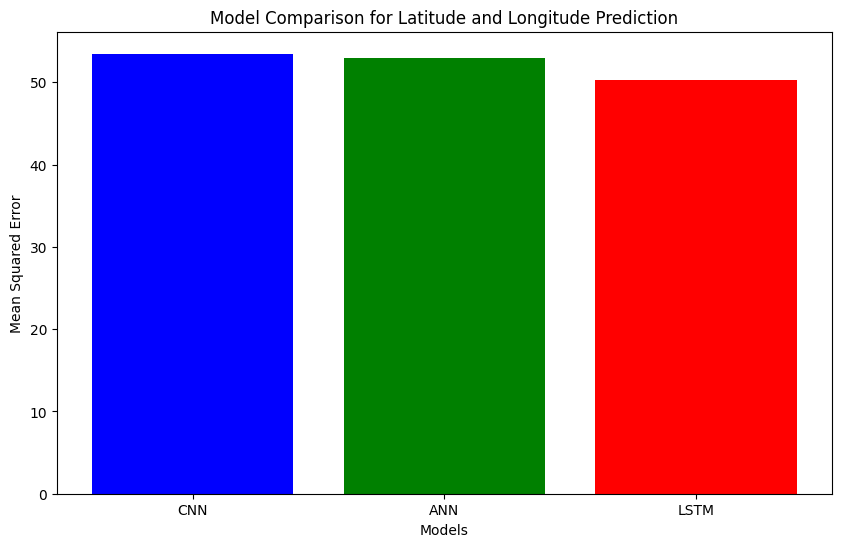

In [ ]:
import matplotlib.pyplot as plt

models = ['CNN', 'ANN', 'LSTM']
mse_values = [cnn_mse1, ann_mse1, lstm_mse1]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison for Latitude and Longitude Prediction')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming bird_data is your dataset with true values
# Example bins for discretizing (adjust the number of bins and range as needed)
latitude_bins = np.linspace(bird_data['latitude'].min(), bird_data['latitude'].max(), num=5)
longitude_bins = np.linspace(bird_data['longitude'].min(), bird_data['longitude'].max(), num=5)
altitude_bins = np.linspace(bird_data['altitude'].min(), bird_data['altitude'].max(), num=5)
speed_bins = np.linspace(bird_data['speed_2d'].min(), bird_data['speed_2d'].max(), num=5)

bird_data['latitude_binned'] = pd.cut(bird_data['latitude'], bins=latitude_bins, labels=False)
bird_data['longitude_binned'] = pd.cut(bird_data['longitude'], bins=longitude_bins, labels=False)
bird_data['altitude_binned'] = pd.cut(bird_data['altitude'], bins=altitude_bins, labels=False)
bird_data['speed_binned'] = pd.cut(bird_data['speed_2d'], bins=speed_bins, labels=False)

# Combine binned values into a single label (example approach)
bird_data['combined_label'] = (bird_data['latitude_binned'].astype(str) + "_" +
                               bird_data['longitude_binned'].astype(str) + "_" +
                               bird_data['altitude_binned'].astype(str) + "_" +
                               bird_data['speed_binned'].astype(str))

# Extract true labels
y_true = bird_data['combined_label'].values


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report:
                  precision    recall  f1-score   support

              0       0.00      0.00      0.00       0.0
0.0_0.0_0.0_0.0       0.00      0.00      0.00   25373.0
0.0_0.0_0.0_1.0       0.00      0.00      0.00     172.0
0.0_0.0_0.0_2.0       0.00      0.00      0.00       6.0
0.0_0.0_0.0_3.0       0.00      0.00      0.00       3.0
0.0_0.0_0.0_nan       0.00      0.00      0.00       5.0
0.0_0.0_1.0_0.0       0.00      0.00      0.00       4.0
0.0_0.0_3.0_0.0       0.00      0.00      0.00       2.0
0.0_0.0_3.0_1.0       0.00      0.00      0.00       1.0
0.0_0.0_nan_0.0       0.00      0.00      0.00       1.0
0.0_nan_0.0_0.0       0.00      0.00      0.00       1.0
              1       0.00      0.00      0.00       0.0
1.0_0.0_0.0_0.0       0.00      0.00      0.00    3744.0
1.0_0.0_0.0_1.0       0.00      0.00      0.00      31.0
1.0_0.0_0.0_2.0       0.00      0.00      0.00       4.0
1.0_1.0_0.0_0.0       0.00      0.00      0.00   11124.0
1.0_1.

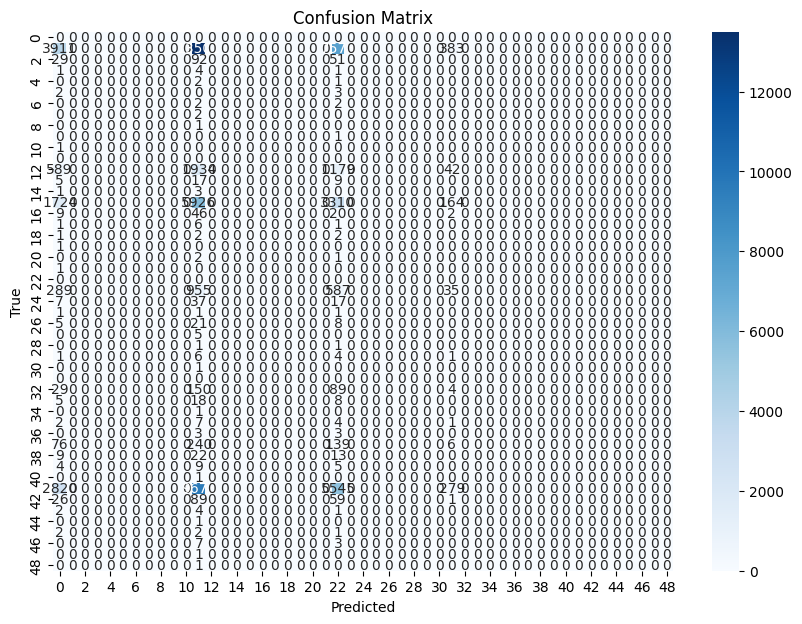

In [ ]:
# Example: Discretize and combine predictions similarly to y_true
cnn_preds = np.random.randint(0, 4, size=len(y_true))  # Replace with actual CNN predictions
ann_preds = np.random.randint(0, 4, size=len(y_true))  # Replace with actual ANN predictions
lstm_preds = np.random.randint(0, 4, size=len(y_true)) # Replace with actual LSTM predictions

# For simplicity, assume cnn_preds, ann_preds, lstm_preds are already combined similar to y_true
# For actual implementation, discretize and combine as done with y_true

# Combine predictions (example using voting mechanism)
combined_preds = (cnn_preds + ann_preds + lstm_preds) // 3

# Convert each element to string and then join with "_"
combined_preds_str = np.array(["_".join(str(x) for x in row) for row in combined_preds.reshape(-1, 1)])

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, combined_preds_str)
class_report = classification_report(y_true, combined_preds_str)

# Print classification report
print("Classification Report:\n", class_report)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
